In [1]:
import pandas as pd
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

matplotlib.style.use('ggplot')
%matplotlib inline

### 1. Полностью разобрать пример «Дома». 
### Найти коэффициенты без переменной AGE.
### Оставить только статистически значимые коэффициенты (объяснить).
### Посчитайте коэффициент детерминации (R2).
### Построить линию регрессии.


In [2]:
df = pd.read_csv('Albuquerque Home Prices.txt', sep='\t')
df = df.replace(-9999, np.nan)

In [3]:
df.head()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13.0,7,1,1,0,1639.0
1,2080,2600,NaN,4,1,1,0,1088.0
2,2150,2664,6.0,5,1,1,0,1193.0
3,2150,2921,3.0,6,1,1,0,1635.0
4,1999,2580,4.0,4,1,1,0,1732.0


In [4]:
df.apply(lambda x: sum(x.isnull()), axis=0)

PRICE     0
SQFT      0
AGE      49
FEATS     0
NE        0
CUST      0
COR       0
TAX      10
dtype: int64

In [5]:
df['TAX'] = df['TAX'].fillna(df['TAX'].mean())

In [6]:
X = df[['SQFT', 'FEATS', 'NE', 'CUST', 'COR', 'TAX']]
y = df[['PRICE']]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
model.summary()

C:\Program Files (x86)\Soft data analyst\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     74.37
Date:                Tue, 19 Nov 2019   Prob (F-statistic):           2.01e-36
Time:                        20:33:47   Log-Likelihood:                -765.84
No. Observations:                 117   AIC:                             1546.
Df Residuals:                     110   BIC:                             1565.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         83.1759     63.308      1.314      0.192     -42.286     208.638
SQFT           0.2920      0.059      4.924      0.000       0.174       0.409
FEATS         12.1767     12.818      0.950      0.344     -13.225      37.579
NE             8.0116     35.098      0.228      0.820     -61.544      77.568
CUST         133.0143     44.756      2.972      0.004      44.319     221.710
COR          -65.8008     41.839     -1.573      0.119    -148.715      17.113
TAX            0.5419      0.102      5.303      0.000       0.339       0.744
==============================================================================
Omnibus:                       11.630   Durbin-Watson:                   1.585
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               33.049
Skew:                          -0.022   Prob(JB):                     6.66e-08
Kurtosis:                       5.603   Cond. No.                     8.00e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
X = df[['SQFT', 'CUST', 'TAX']]
y = df[['PRICE']]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     146.7
Date:                Tue, 19 Nov 2019   Prob (F-statistic):           8.27e-39
Time:                        20:33:47   Log-Likelihood:                -767.75
No. Observations:                 117   AIC:                             1544.
Df Residuals:                     113   BIC:                             1555.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.9684     57.506      1.738      0.085     -13.961     213.898
SQFT           0.2810      0.059      4.802      0.000       0.165       0.397
CUST         136.2193     44.778      3.042      0.003      47.506     224.932
TAX            0.5881      0.099      5.929      0.000       0.392       0.785
==============================================================================
Omnibus:                       13.911   Durbin-Watson:                   1.562
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               46.410
Skew:                          -0.111   Prob(JB):                     8.36e-11
Kurtosis:                       6.077   Cond. No.                     7.36e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

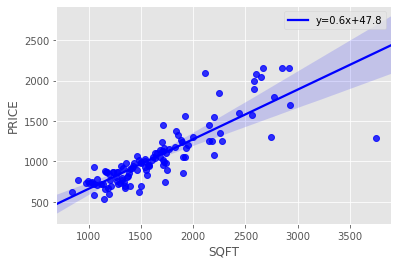

In [8]:
import seaborn as sns
from scipy import stats 

slope, intercept, r_value, p_value, std_err = stats.linregress(df['SQFT'], df['PRICE'])

ax=sns.regplot(x='SQFT', y='PRICE', data=df, color='b',
              line_kws={'label': "y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.legend()

plt.show()

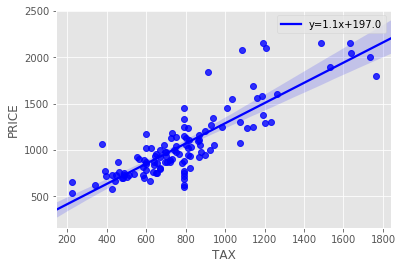

In [9]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['TAX'], df['PRICE'])

ax=sns.regplot(x='TAX', y='PRICE', data=df, color='b',
              line_kws={'label': "y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.legend()

plt.show()

### 2.	Постараться максимально близко восстановить пустые значения (NaN) для переменной AGE. Для этого постройте модель для известных значений PRICE и AGE, найдите коэффициенты и на основе полученной модели заполните пустые значения.
### Повторите все из (1) с учетом восстановленной переменной AGE


In [10]:
age_dropped = df[['AGE', 'PRICE']].dropna()

In [11]:
age_dropped.head()

,AGE,PRICE
0,13.0,2050
2,6.0,2150
3,3.0,2150
4,4.0,1999
5,4.0,1900


In [12]:
X = age_dropped[['AGE']]
y = age_dropped[['PRICE']]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
model.summary()

C:\Program Files (x86)\Soft data analyst\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.933
Date:                Tue, 19 Nov 2019   Prob (F-statistic):              0.169
Time:                        20:33:48   Log-Likelihood:                -502.93
No. Observations:                  68   AIC:                             1010.
Df Residuals:                      66   BIC:                             1014.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1244.2712     75.461     16.489      0.000    1093.609    1394.933
AGE           -5.3659      3.860     -1.390      0.169     -13.072       2.340
==============================================================================
Omnibus:                       13.322   Durbin-Watson:                   0.966
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.768
Skew:                           1.123   Prob(JB):                     0.000621
Kurtosis:                       3.412   Cond. No.                         30.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

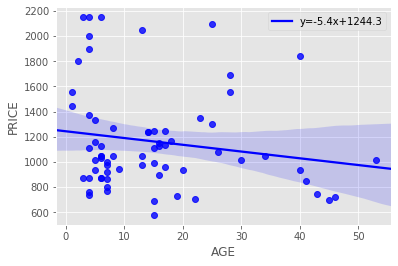

In [13]:
slope, intercept, r_value, p_value, std_err = stats.linregress(age_dropped['AGE'], age_dropped['PRICE'])

ax=sns.regplot(x='AGE', y='PRICE', data=age_dropped, color='b',
              line_kws={'label': "y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.legend()

plt.show()

In [14]:
age_unknown = df[df['AGE'].isna()][['PRICE', 'AGE']]
age_unknown.head()

,PRICE,AGE
1,2080,NaN
8,1450,NaN
15,1180,NaN
19,995,NaN
21,975,NaN


In [15]:
age_unknown['AGE'] = (age_unknown['PRICE'] - intercept)/slope
age_unknown.head(15)

,PRICE,AGE
1,2080,-155.749338
8,1450,-38.340335
15,1180,11.977810
19,995,46.455057
21,975,50.182327
22,975,50.182327
25,860,71.614129
28,1250,-1.067635
29,1300,-10.385810
32,922,60.059592


In [16]:
def convert_to_0 (x):
    if x<0:
        return(0)
    else:
        return(x)

In [17]:
age_unknown['AGE'] = age_unknown['AGE'].apply(convert_to_0)
age_unknown.head(15)

,PRICE,AGE
1,2080,0.000000
8,1450,0.000000
15,1180,11.977810
19,995,46.455057
21,975,50.182327
22,975,50.182327
25,860,71.614129
28,1250,0.000000
29,1300,0.000000
32,922,60.059592


In [18]:
data = pd.concat([age_dropped, age_unknown])
data

C:\Program Files (x86)\Soft data analyst\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,AGE,PRICE
0,13.000000,2050
2,6.000000,2150
3,3.000000,2150
4,4.000000,1999
5,4.000000,1900
...,...,...
89,96.773201,725
90,108.886828,660
91,120.068638,600
94,0.000000,1580


In [19]:
pd.set_option('display.max_rows', 150)

In [20]:
df['AGE'] = data['AGE']
df

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13.000000,7,1,1,0,1639.000000
1,2080,2600,0.000000,4,1,1,0,1088.000000
2,2150,2664,6.000000,5,1,1,0,1193.000000
3,2150,2921,3.000000,6,1,1,0,1635.000000
4,1999,2580,4.000000,4,1,1,0,1732.000000
5,1900,2580,4.000000,4,1,0,0,1534.000000
6,1800,2774,2.000000,4,1,0,0,1765.000000
7,1560,1920,1.000000,5,1,1,0,1161.000000
8,1450,2150,0.000000,4,1,0,0,793.485981
9,1449,1710,1.000000,3,1,1,0,1010.000000


In [21]:
X = df[['SQFT', 'CUST', 'TAX', 'AGE']]
y = df[['PRICE']]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     117.5
Date:                Tue, 19 Nov 2019   Prob (F-statistic):           3.89e-39
Time:                        20:33:49   Log-Likelihood:                -764.25
No. Observations:                 117   AIC:                             1539.
Df Residuals:                     112   BIC:                             1552.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        223.3688     73.131      3.054      0.003      78.469     368.269
SQFT           0.2641      0.057      4.602      0.000       0.150       0.378
CUST         131.5286     43.688      3.011      0.003      44.966     218.092
TAX            0.5305      0.099      5.350      0.000       0.334       0.727
AGE           -1.3256      0.504     -2.628      0.010      -2.325      -0.326
==============================================================================
Omnibus:                       15.631   Durbin-Watson:                   1.530
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.422
Skew:                           0.070   Prob(JB):                     4.60e-14
Kurtosis:                       6.547   Cond. No.                     9.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 3.	Бриллианты. Разобрать все примеры. Построить три модели. Построить графики с линиями регрессий. Объяснить выбор модели.

In [22]:
df = pd.read_csv('diamond.dat', header=None, sep='\s+', names=['weight', 'price'])

In [23]:
df.head()

,weight,price
0,0.17,355
1,0.16,328
2,0.17,350
3,0.18,325
4,0.25,642


In [24]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(
                          # Максимальная степень
                          degree=2,
                          # Не генерировать свободный член
                          include_bias=False)
y = df['price']
X0 = poly.fit_transform(df[['weight']])
X0 = pd.DataFrame(X0, columns=['weight', 'weight^2'])
X0.head()

,weight,weight^2
0,0.17,0.0289
1,0.16,0.0256
2,0.17,0.0289
3,0.18,0.0324
4,0.25,0.0625


In [25]:
X0 = [X0[['weight']],
     X0[['weight^2']],
     X0.copy()]
models = [LinearRegression() for _ in X0]

In [26]:
for X, model in zip(X0, models):
    model.fit(X, y)
    print(model.score(X, y))

0.978260777986033
0.970310818417109
0.9789175801893899


In [27]:
X = X0[0]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
model.summary()

C:\Program Files (x86)\Soft data analyst\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     2070.
Date:                Tue, 19 Nov 2019   Prob (F-statistic):           6.75e-40
Time:                        20:33:49   Log-Likelihood:                -233.20
No. Observations:                  48   AIC:                             470.4
Df Residuals:                      46   BIC:                             474.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -259.6259     17.319    -14.991      0.000    -294.487    -224.765
weight      3721.0249     81.786     45.497      0.000    3556.398    3885.651
==============================================================================
Omnibus:                        0.739   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.691   Jarque-Bera (JB):                0.181
Skew:                           0.056   Prob(JB):                        0.913
Kurtosis:                       3.280   Cond. No.                         18.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
X = X0[1]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     1503.
Date:                Tue, 19 Nov 2019   Prob (F-statistic):           8.79e-37
Time:                        20:33:49   Log-Likelihood:                -240.68
No. Observations:                  48   AIC:                             485.4
Df Residuals:                      46   BIC:                             489.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        141.6590     10.691     13.250      0.000     120.139     163.179
weight^2    7993.1081    206.149     38.774      0.000    7578.152    8408.064
==============================================================================
Omnibus:                        3.754   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.153   Jarque-Bera (JB):                2.765
Skew:                           0.559   Prob(JB):                        0.251
Kurtosis:                       3.361   Cond. No.                         38.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
X = X0[2]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     1045.
Date:                Tue, 19 Nov 2019   Prob (F-statistic):           1.94e-38
Time:                        20:33:49   Log-Likelihood:                -232.47
No. Observations:                  48   AIC:                             470.9
Df Residuals:                      45   BIC:                             476.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -174.1301     74.238     -2.346      0.023    -323.653     -24.607
weight      2920.1306    681.297      4.286      0.000    1547.928    4292.333
weight^2    1739.9016   1469.472      1.184      0.243   -1219.767    4699.570
==============================================================================
Omnibus:                        1.961   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.375   Jarque-Bera (JB):                1.075
Skew:                           0.215   Prob(JB):                        0.584
Kurtosis:                       3.593   Cond. No.                         362.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
#В 1 и 3 модели отрицательный свободный член, значит, при весе бриллианта = 0 он стоит отрицательное кол-во денег
#поэтому выбираем 2 модель

### 4.	Временные ряды. Разобрать пример. Построить прогноз на следующие 12 месяцев. Вывести предсказанные результаты и результаты за последний (12-й год) в виде чисел.

In [31]:
df = pd.read_csv('series_g.csv', sep=';')
df.head()

,date,series_g
0,JAN 1949,112
1,FEB 1949,118
2,MAR 1949,132
3,APR 1949,129
4,MAY 1949,121


In [32]:
df['date'] = pd.to_datetime(df['date'], format='%b %Y')

In [33]:
df

,date,series_g
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
5,1949-06-01,135
6,1949-07-01,148
7,1949-08-01,148
8,1949-09-01,136
9,1949-10-01,119


Text(0, 0.5, 'log10 от тысяч человек')

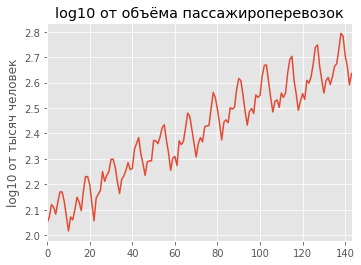

In [34]:
fig = plt.figure(figsize=(12, 4))
ax2 = fig.add_subplot(122)
pd.Series(np.log10(df['series_g'])).plot(ax=ax2)
ax2.set_title(u'log10 от объёма пассажироперевозок')
ax2.set_ylabel(u'log10 от тысяч человек')

In [35]:
new_dates = pd.date_range('1961-01-01', '1961-12-01', freq='MS')
new_dates = pd.Index(df['date']) | new_dates
df2 = pd.DataFrame({'date': new_dates})
df = pd.merge(df, df2, on='date', how='right')

In [36]:
df.tail()

,date,series_g
151,1961-08-01,NaN
152,1961-09-01,NaN
153,1961-10-01,NaN
154,1961-11-01,NaN
155,1961-12-01,NaN


In [37]:
df['month_num'] = range(1, len(df) + 1)
df['log_y'] = np.log10(df['series_g'])

In [38]:
for x in range(1, 13):
    df['season_' + str(x)] = df['date'].dt.month == x

In [39]:
df

,date,series_g,month_num,log_y,season_1,season_2,season_3,season_4,season_5,season_6,season_7,season_8,season_9,season_10,season_11,season_12
0,1949-01-01,112.0,1,2.049218,True,False,False,False,False,False,False,False,False,False,False,False
1,1949-02-01,118.0,2,2.071882,False,True,False,False,False,False,False,False,False,False,False,False
2,1949-03-01,132.0,3,2.120574,False,False,True,False,False,False,False,False,False,False,False,False
3,1949-04-01,129.0,4,2.110590,False,False,False,True,False,False,False,False,False,False,False,False
4,1949-05-01,121.0,5,2.082785,False,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,1961-08-01,NaN,152,NaN,False,False,False,False,False,False,False,True,False,False,False,False
152,1961-09-01,NaN,153,NaN,False,False,False,False,False,False,False,False,True,False,False,False
153,1961-10-01,NaN,154,NaN,False,False,False,False,False,False,False,False,False,True,False,False
154,1961-11-01,NaN,155,NaN,False,False,False,False,False,False,False,False,False,False,True,False


In [40]:
season_columns = ['season_' + str(x) for x in range(2, 13)]

X = df[['month_num'] + season_columns]
y = df['log_y']

# Оставим только те строчки, у которых известны значения y (с номером < 144)
X1 = X[X.index < 144]
y1 = y[y.index < 144]

In [41]:
model = LinearRegression()
model.fit(X1, y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

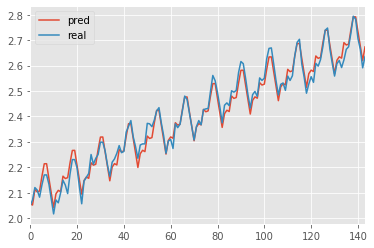

In [42]:
pred = pd.DataFrame({
    'pred': model.predict(X1),
    'real': y1})
pred.plot();

In [43]:
pred.tail()

,pred,real
139,2.791531,2.782473
140,2.733090,2.705864
141,2.677461,2.663701
142,2.619418,2.591065
143,2.673242,2.635484


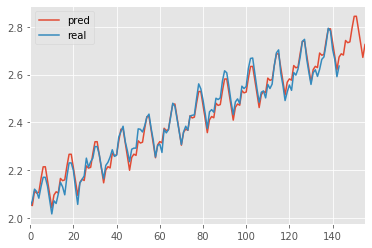

In [44]:
pred = pd.DataFrame({
    'pred': model.predict(X),
    'real': y})
pred.plot();

In [45]:
predict_next_year = pd.DataFrame({
    'last': df[(df.index > 131) & (df.index < 144)].series_g.tolist(),
    'predict': (10**(pred[pred.index > 143].pred)).tolist()}, index = range(1,13))

predict_next_year

,last,predict
1,417.0,486.266611
2,391.0,480.473001
3,419.0,552.839079
4,461.0,541.242225
5,472.0,545.423784
6,535.0,622.521448
7,622.0,697.700003
8,606.0,698.240208
9,508.0,610.328529
10,461.0,536.951593


# Теоретические вопросы:

##### 1.	Линейная регрессия

Линейная регрессия — используемая в статистике регрессионная модель зависимости одной (объясняемой, зависимой) переменной y от другой или нескольких других переменных (факторов, регрессоров, независимых переменных) x с линейной функцией зависимости.

- Она легко моделируется и является особенно полезной при создании не очень сложной зависимости, а также при небольшом количестве данных.
- Обозначения интуитивно-понятны.
- Чувствительна к выбросам.

##### 2.	Полиномиальная регрессия.

Для создания такой модели, которая подойдет для нелинейно разделяемых данных, можно использовать полиномиальную регрессию. В данном методе проводится кривая линия, зависимая от точек плоскости. В полиномиальной регрессии степень некоторых независимых переменных превышает 1.

- Моделирует нелинейно разделенные данные (чего не может линейная регрессия). Она более гибкая и может моделировать сложные взаимосвязи.
- Полный контроль над моделированием переменных объекта (выбор степени).
- Необходимо внимательно создавать модель. Необходимо обладать некоторыми знаниями о данных, для выбора наиболее подходящей степени.
- При неправильном выборе степени, данная модель может быть перенасыщена.

##### 3.	Метод наименьших квадратов. 

Метод наименьших квадратов — математический метод, применяемый для решения различных задач, основанный на минимизации суммы квадратов отклонений некоторых функций от искомых переменных. 

##### 4.	Метод максимального правдоподобия.

Метод максимального правдоподобия или метод наибольшего правдоподобия в математической статистике — это метод оценивания неизвестного параметра путём максимизации функции правдоподобия. Основан на предположении о том, что вся информация о статистической выборке содержится в функции правдоподобия.

Функция правдоподобия в математической статистике — это совместное распределение выборки из параметрического распределения, рассматриваемое как функция параметра. При этом используется совместная функция плотности (в случае выборки из непрерывного распределения) либо совместная вероятность (в случае выборки из дискретного распределения), вычисленные для данных выборочных значений.

##### 5.	Теорема Гаусса-Маркова

Теорема Гаусса – Маркова формулирует условия, при которых МНК позволяет получить наилучшие оценки параметров линейной модели множественной регрессии.

##### 6.	Регуляризация: L2 L1

Регуляризация в статистике, машинном обучении, теории обратных задач — метод добавления некоторых дополнительных ограничений к условию с целью решить некорректно поставленную задачу или предотвратить переобучение. Эта информация часто имеет вид штрафа за сложность модели. Например, это могут быть ограничения гладкости результирующей функции или ограничения по норме векторного пространства.

L1-регуляризация (lasso regression), или регуляризация через манхэттенское расстояние:

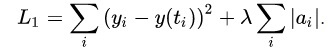

In [51]:
from PIL import Image
L1 = Image.open("L1.jpg");
L1

L2- регуляризация, или регуляризация Тихонова (ridge regression или Tikhonov regularization), для интегральных уравнений позволяет балансировать между соответствием данным и маленькой нормой решения:

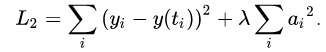

In [52]:
L2 = Image.open("L2.jpg");
L2